In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Uploade the bank.csv dataset**

In [59]:
bank = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=';', quotechar='"')

# Display basic information
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


**Data preprocessing**

In [60]:
# Check for missing values in the bank dataset
missing_values = bank.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [61]:
# Handle categorical and numerical features
categorical_features = bank.select_dtypes(include=['object']).columns
numerical_features = bank.select_dtypes(include=['int64', 'float64']).columns

# Handle target variable
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

# Check class distribution
print(bank['y'].value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


**Data Analysis**

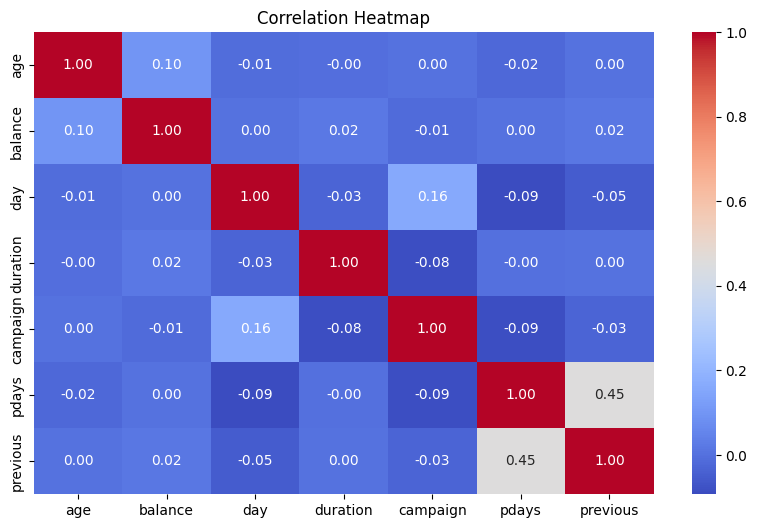

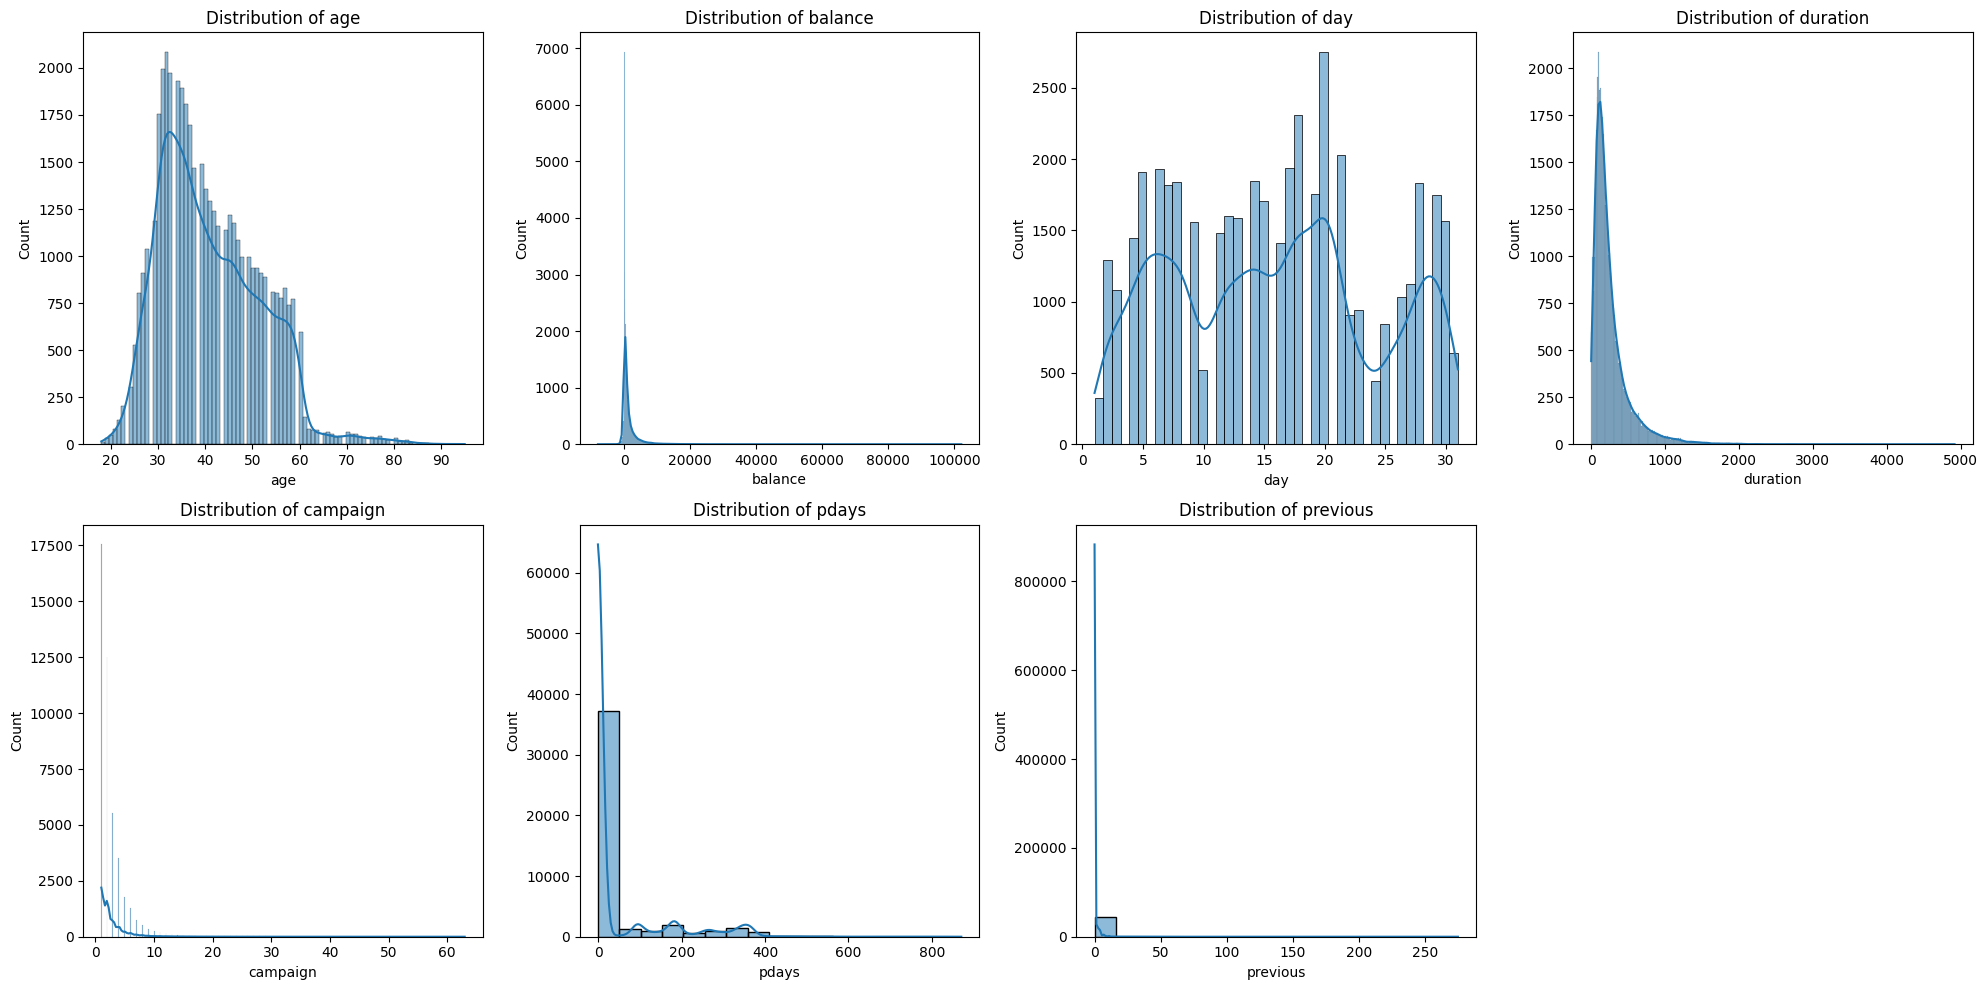

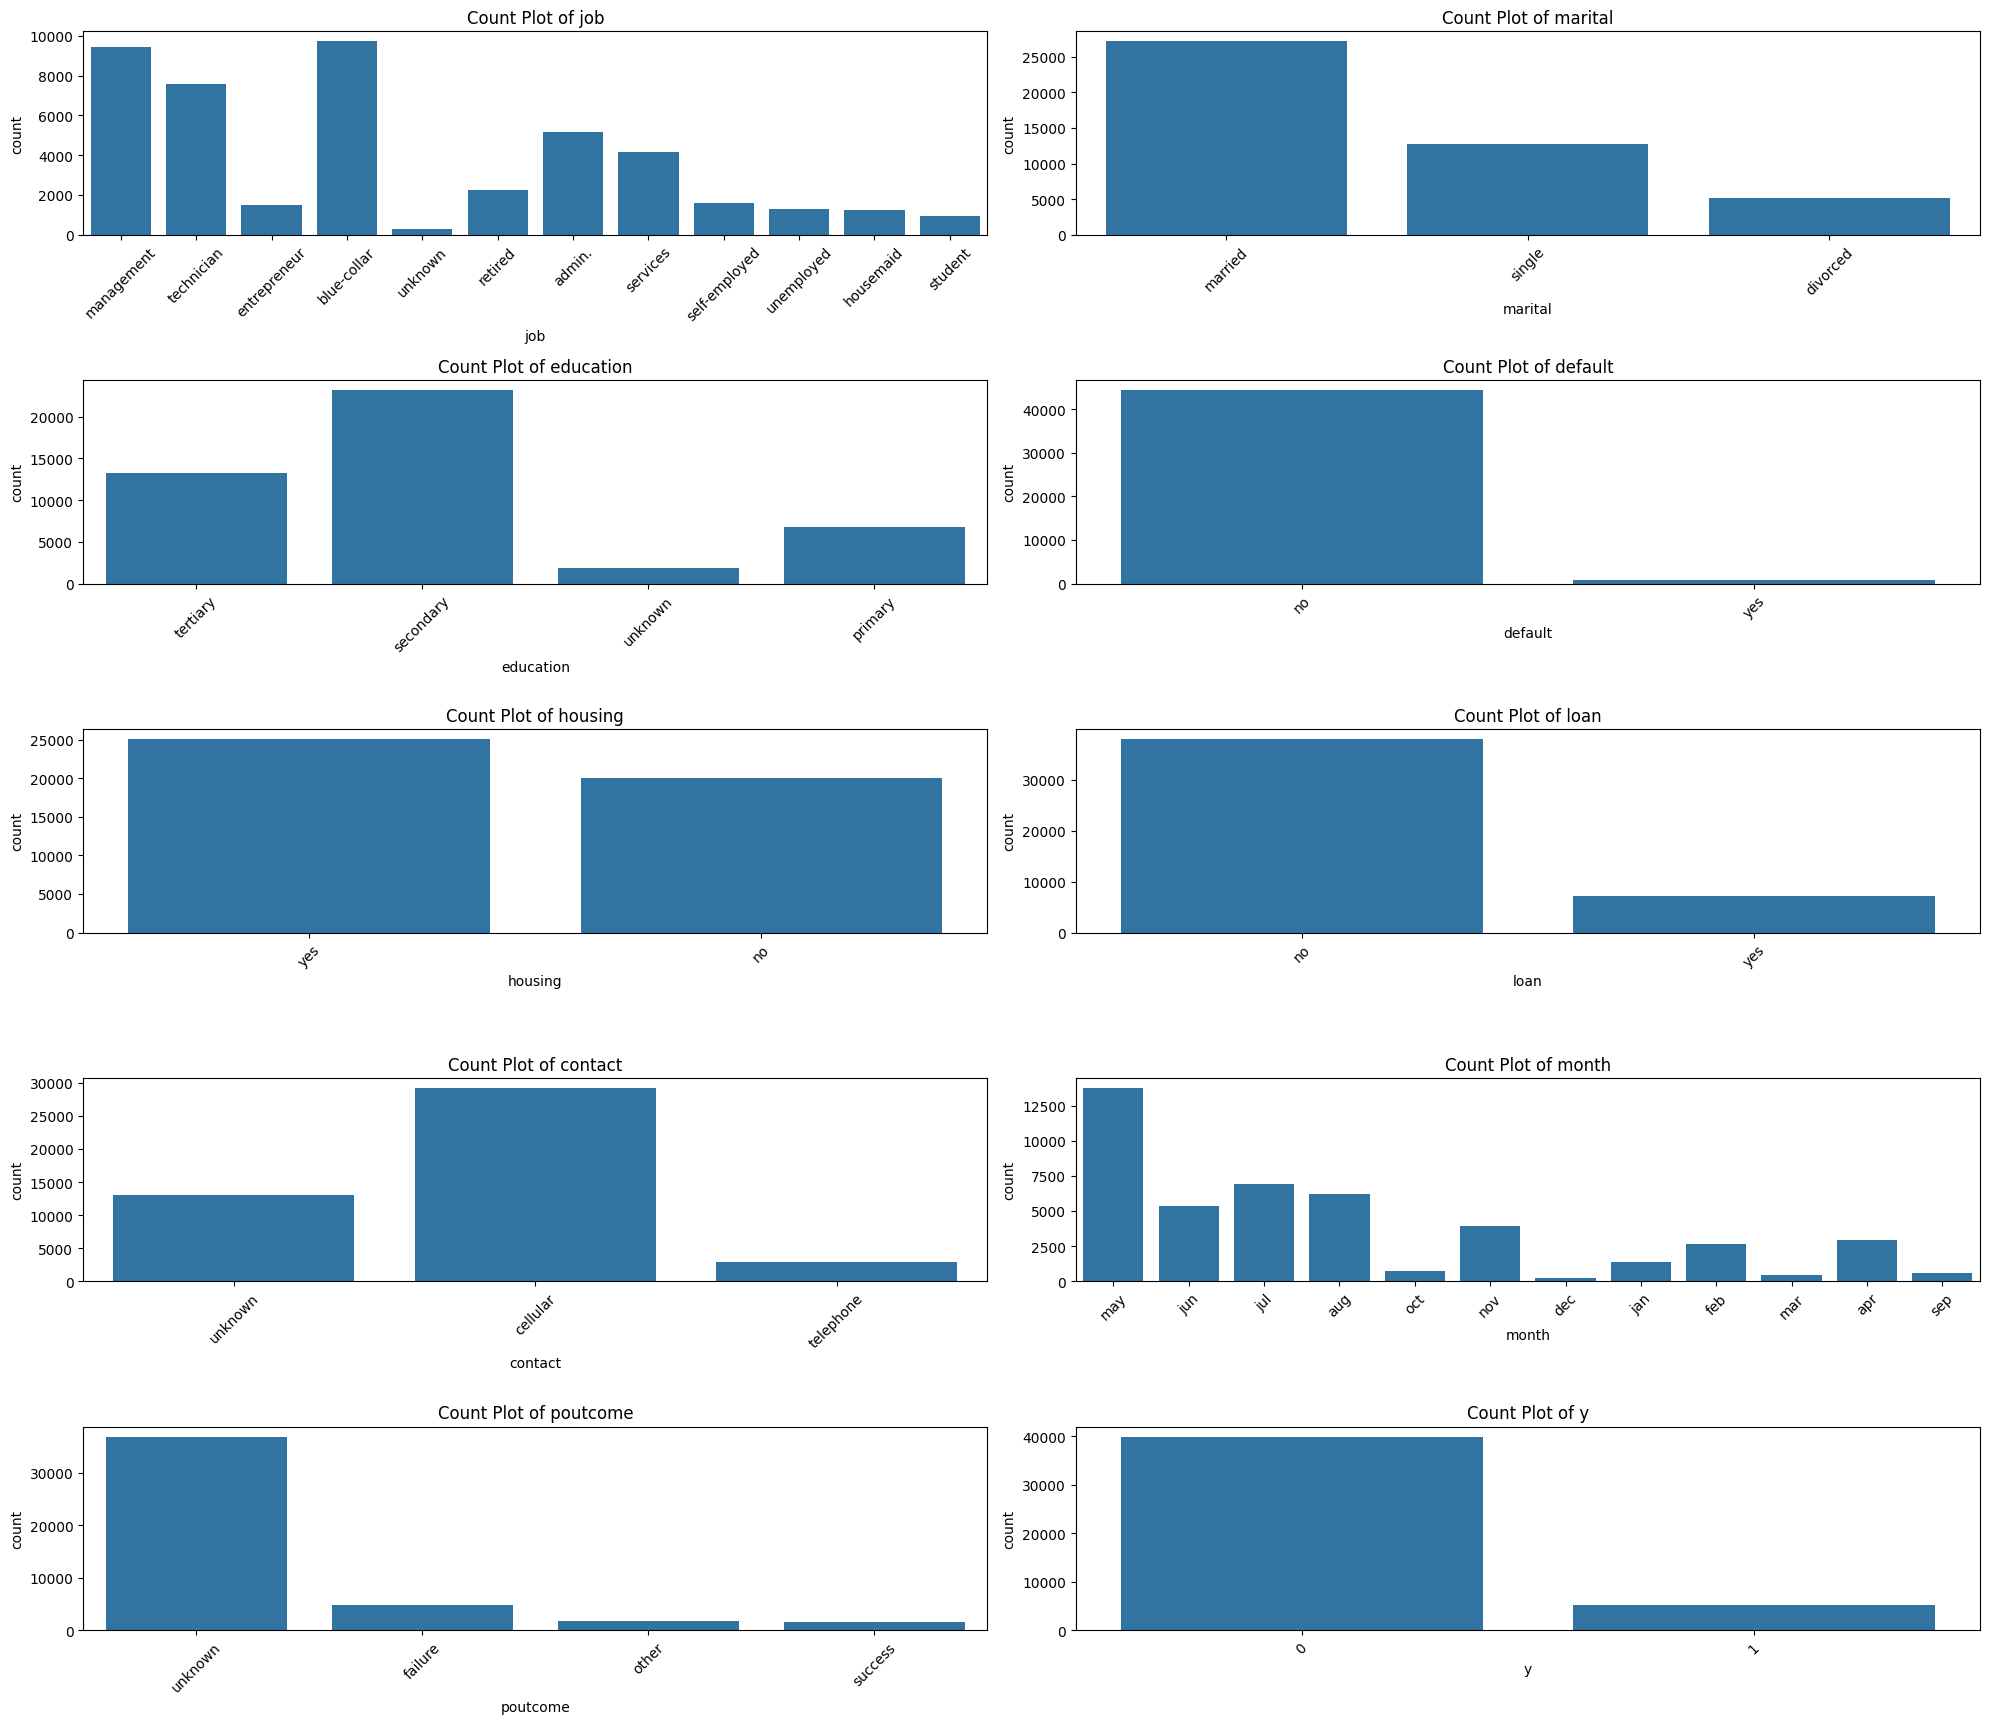

In [25]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(bank[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plotting numerical features in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten for easier indexing
for i, feature in enumerate(numerical_features):
    sns.histplot(bank[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
# Leave the last one blank with no axis
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots
plt.tight_layout()
plt.show()

# Plotting categorical features
fig, axes = plt.subplots(len(categorical_features) // 2 + 1, 2, figsize=(20, 20))
axes = axes.flatten()  # Flatten for easier indexing
for i, feature in enumerate(categorical_features):
    sns.countplot(x=bank[feature], ax=axes[i])
    axes[i].set_title(f"Count Plot of {feature}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots
plt.tight_layout()
plt.show()


In [62]:
# One-Hot Encoding for categorical features
bank = pd.get_dummies(bank, columns=categorical_features, drop_first=True)

In [49]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_1
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [28]:
# Standardize numerical features
scaler = StandardScaler()
bank[numerical_features] = scaler.fit_transform(bank[numerical_features])

# Split into features and target
X = bank.drop('y_1', axis=1, inplace=False)
y = bank['y_1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
from sklearn.compose import make_column_selector

# Define column selectors
numerical_features = make_column_selector(dtype_include=['int64', 'float64'])
categorical_features = make_column_selector(dtype_include=['object'])

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [30]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier()
}


In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Calculate AUC
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = "N/A"  # If the model does not support probability prediction

    # Print a classification report for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    if auc != "N/A":
        print(f"AUC: {auc:.2f}")
    else:
        print("AUC: N/A")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display summary of results
# print("Summary of Model Performance:")
# for model_name, accuracy in results.items():
#     print(f"{model_name}: {accuracy:.2f}")

Model: Logistic Regression
Accuracy: 0.90
AUC: 0.90
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95     11977
        True       0.65      0.35      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.87
AUC: 0.69
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11977
        True       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

--------------------------------------------------
Model: Random Forest
Accuracy: 0.91
AUC: 0.93
Classification Report:
              precision    reca

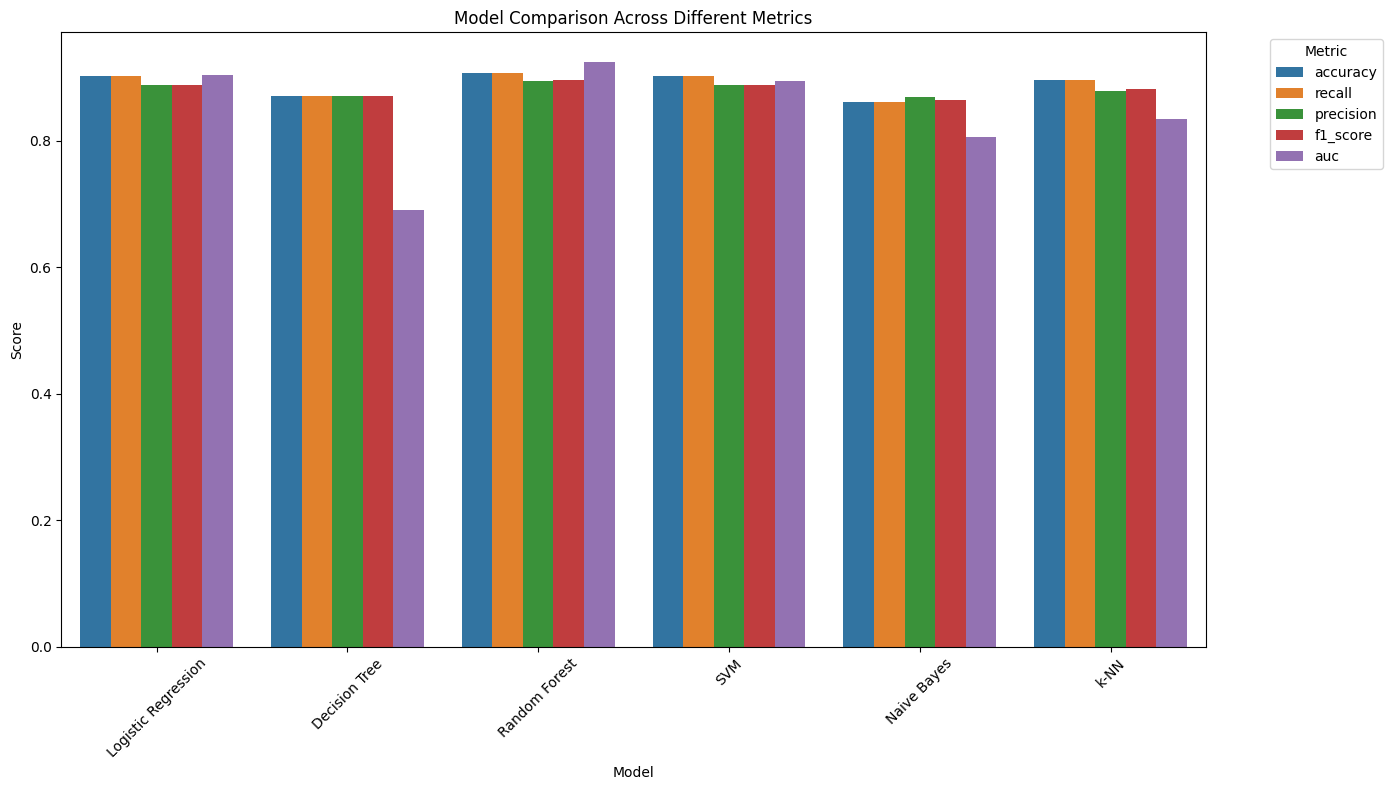

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd

# Initialize dictionaries to store the metrics and trained models
metrics = {
    'accuracy': {},
    'recall': {},
    'precision': {},
    'f1_score': {},
    'auc': {}
}
trained_models = {}

# Calculate metrics for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the trained model
    trained_models[model_name] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Store metrics
    metrics['accuracy'][model_name] = accuracy_score(y_test, y_pred)
    metrics['recall'][model_name] = recall_score(y_test, y_pred, average='weighted')
    metrics['precision'][model_name] = precision_score(y_test, y_pred, average='weighted')
    metrics['f1_score'][model_name] = f1_score(y_test, y_pred, average='weighted')
    if y_prob is not None:
        metrics['auc'][model_name] = roc_auc_score(y_test, y_prob, average='weighted')
    else:
        metrics['auc'][model_name] = None

# Prepare data for plotting
metric_names = list(metrics.keys())
model_names = list(models.keys())
data = []

for metric_name in metric_names:
    for model_name in model_names:
        data.append((model_name, metric_name, metrics[metric_name][model_name]))

# Convert data to DataFrame
df = pd.DataFrame(data, columns=['Model', 'Metric', 'Value'])

# Plot the metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df)
plt.title('Model Comparison Across Different Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison.png')

# Show the plot
plt.show()

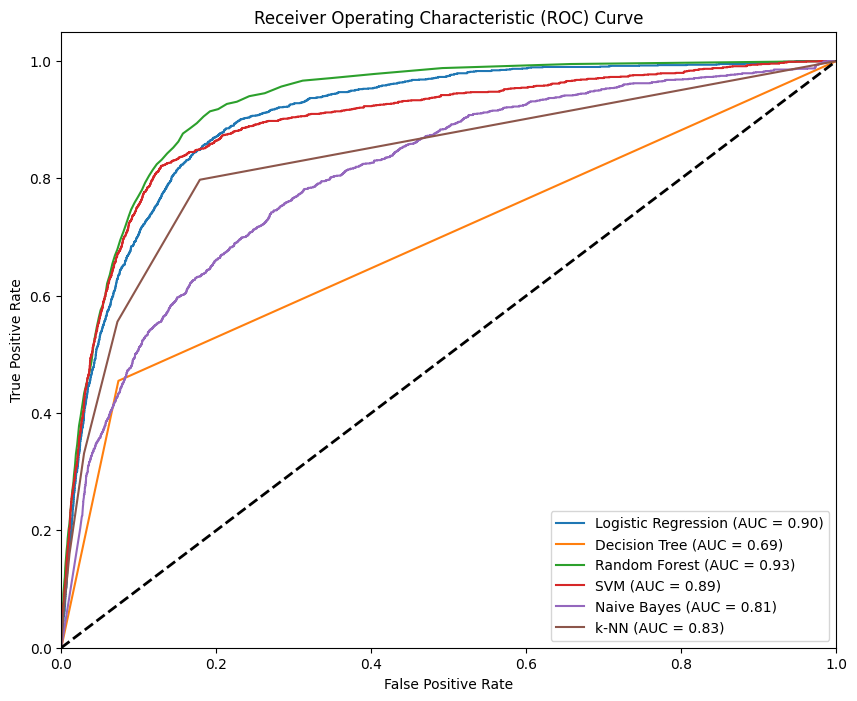

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, model in trained_models.items():
    # Get the predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    if y_prob is not None:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()